In [1]:
# imports
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as plt
%matplotlib inline
import datetime as dt
import mplfinance as mpf
import yfinance as yf

In [2]:
# Save stock data as csv
def save_to_csv(ticker,syear,smonth,sday,eyear,emonth,eday):
    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)

    df = yf.download(ticker, start=start, end=end)

    df.to_csv("/workspaces/Quantitative-Finance/Basic/"+ticker+'.csv')
    return df

In [3]:
# save_to_csv('AMZN',2023,1,1,2024,1,1)

In [4]:
# get df from a csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("/workspaces/Quantitative-Finance/Basic/"+ticker+'.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df

In [5]:
df = get_df_from_csv('AMZN')

In [6]:
# Add daily return to DataFrame
def add_daily_return_to_diff(df,ticker):
    df['daily_return'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
    df.to_csv("/workspaces/Quantitative-Finance/Basic/"+ticker+'.csv')
    return df

In [7]:
# add_daily_return_to_diff(df,'AMZN')

In [8]:
# Total return over Time
def get_return_defined_time(df,syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date']>=start) & (df['Date']<= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    # print(df2)
    return (days * daily_ret)

In [9]:
get_return_defined_time(df,2023,1,1,2023,2,1)

0.21968440395837516

In [10]:
# Matplotlib Finance
def mplfinance_plot(ticker,chart_type,syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        df = pd.read_csv("/workspaces/Quantitative-Finance/Basic/"+ticker+'.csv')
    except FileNotFoundError:
        print("File doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub,type='candle')
        mpf.plot(df_sub,type='line')
        mpf.plot(df_sub,type='ohlc',mav=4)

        s = mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size':8})
        fig = mpf.figure(figsize=(12,8),style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2,sharex=ax)
        mpf.plot(df_sub,type=chart_type,mav=(3,5,7),ax=ax,volume=av,show_nontrading=True)
        

    

In [11]:
# mplfinance_plot('AMZN','ohlc',2023,1,1,2023,2,1)

In [12]:
# Simple Finance Plot
def price_plot(ticker,chart_type,syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        df = pd.read_csv("/workspaces/Quantitative-Finance/Basic/"+ticker+'.csv')
    except FileNotFoundError:
        print("File doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy()
        np_adj_close = df_np[:,:5]
        date_arr = df_np[:,1]
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr,np_adj_close,color='navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True,color='0.6',dashes=(5,2,1,2))
        axes.set_facecolor('#FAEBD7')

In [13]:
def price_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth:02d}-{sday:02d}"
    end = f"{eyear}-{emonth:02d}-{eday:02d}"

    try:
        df = pd.read_csv(f"/workspaces/Quantitative-Finance/Basic/{ticker}.csv", parse_dates=['Date'])
    except FileNotFoundError:
        print("File doesn't exist")
        return
    
    df.set_index('Date', inplace=True)
    df_sub = df.loc[start:end]
    
    if df_sub.empty:
        print("No data available for the given date range")
        return
    
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    
    if chart_type == 'ohlc':
        ax.plot(df_sub.index, df_sub['Adj Close'], color='navy', label='Adj Close')
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))
    ax.set_facecolor('#FAEBD7')
    ax.set_title(f'{ticker} Stock Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.show()

# price_plot('AMZN', 'ohlc', 2023, 1, 1, 2023, 2, 1)


In [14]:
# Download Multiple stocks
def download_multiple_stocks(syear,smonth,sday,eyear,emonth,eday, *args):
    for x in args:
        save_to_csv(x,syear,smonth,sday,eyear,emonth,eday)

In [15]:
tickers = ['META',"AAPL","NFLX","GOOG"]
download_multiple_stocks(2023,1,1,2023,2,1,*tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
# Merge Multiple stock in on df
def merge_df_by_column_name(col_name,syear,smonth,sday,eyear,emonth,eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = yf.download(x, start=start, end=end)[col_name]
    return mult_df

In [17]:
# Get Changing value of investment using multi stocks
def plot_return_mult_stocks(investment, stock_df):
    (stock_df/stock_df.iloc[0] * investment).plot(figsize = (15,6))
    

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


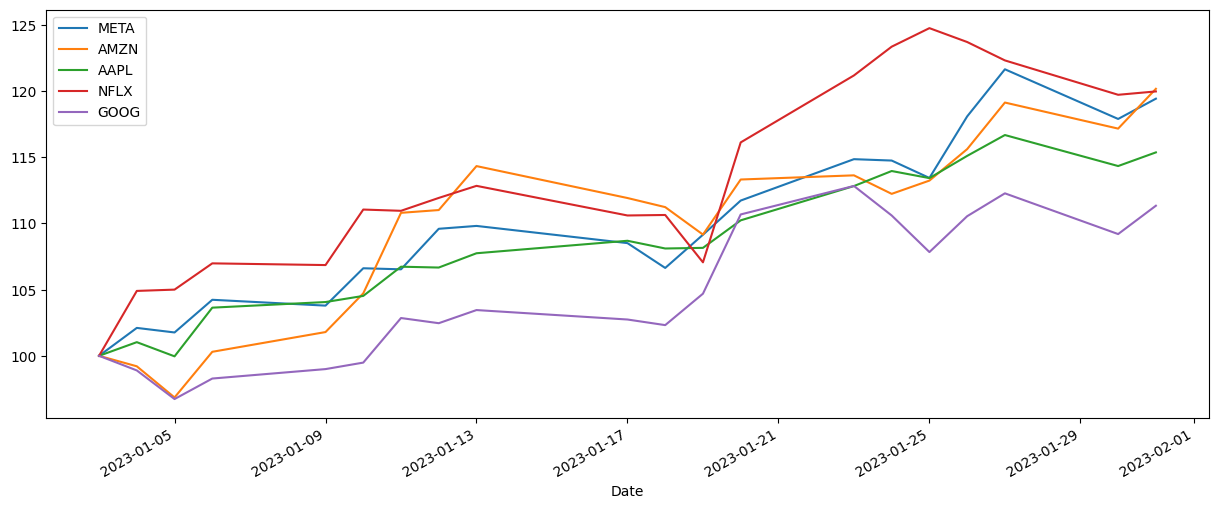

In [18]:
tickers = ['META',"AMZN","AAPL","NFLX","GOOG"]
mult_df = merge_df_by_column_name('Adj Close',2023, 1, 1, 2023, 2, 1, *tickers)
plot_return_mult_stocks(100,mult_df)

In [21]:
mult_df.head()

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2023-01-03,124.607788,85.820000,124.048042,294.950012,89.699997
2023-01-04,127.235008,85.139999,125.327507,309.410004,88.709999
2023-01-05,126.805458,83.120003,123.998459,309.700012,86.769997
2023-01-06,129.882202,86.080002,128.560852,315.549988,88.160004
2023-01-09,129.332779,87.360001,129.086517,315.170013,88.800003


In [19]:
def get_stock_mean_sd(stock_df,ticker):
    return stock_df[ticker].mean(),stock_df[ticker].std()

In [24]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean,sd = get_stock_mean_sd(stock_df,stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard Deviation: {:2.2f}".format(stock,mean,sd))
        print("coefficient of variation: {}\n".format(cov))

In [25]:
get_mult_stock_mean_sd(mult_df)

Stock: META Mean:  137.10 Standard Deviation: 7.84
coefficient of variation: 0.05721042396162373

Stock: AMZN Mean:   94.22 Standard Deviation: 5.95
coefficient of variation: 0.0631513714162408

Stock: AAPL Mean:  134.67 Standard Deviation: 6.58
coefficient of variation: 0.048872695892185465

Stock: NFLX Mean:  334.76 Standard Deviation: 21.83
coefficient of variation: 0.06520024947071669

Stock: GOOG Mean:   94.02 Standard Deviation: 4.79
coefficient of variation: 0.05094489324779143

